In [1]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [2]:
# choose path for your dataset
path_data = "../data/"

In [3]:
df_train = pd.read_csv(path_data + 'train.csv')

In [4]:
df_train.experiment = df_train.experiment.astype('category')
df_train.event = df_train.event.astype('category')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int64
experiment    category
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event         category
dtypes: category(2), float64(24), int64(2)
memory usage: 974.8 MB


In [6]:
subset = df_train.loc[(df_train['crew'] == 1) & (df_train['experiment'] == 'SS') & (df_train['seat'] == 0) ]
subset.sort_values(by='time');

In [7]:
# test = df_train.loc[(df_train['experiment'] == 'DA') ];
# (test['ecg'] ==0).sum()

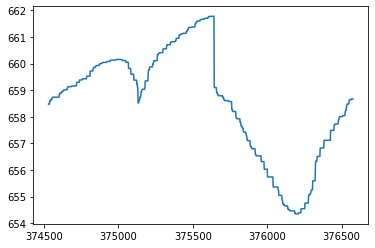

In [8]:
plt.plot(subset['r'][3000:4024])

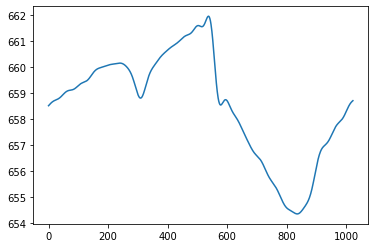

In [9]:
b, a = signal.butter(8,0.05)

y = signal.filtfilt(b, a, subset['r'], padlen=150)

plt.plot(y[3000:4024])

In [10]:
def data_state_subplot(data_train,crew, seat):
    print('Plots for ecg, r, and gsr readings.')
    print('Orange denotes an event( SS, CA, DA) & blue denotes baseline cognitive state.')
    fig, ax = plt.subplots(3, 3,figsize=(20,20), sharex='col', sharey='row')
    
        
    for j, y in enumerate(['CA','DA','SS']):
        for i, x in enumerate(['ecg','r','gsr']):
            
            
            example = data_train.loc[(data_train.crew==crew)&(data_train.experiment==y)&(data_train.seat==seat)].sort_values(by='time').reset_index()
            ax[i,j].scatter(x=example.loc[example.event=='A'].time, y=example.loc[example.event=='A'][x], s=0.5)
            ax[i,j].set_xlabel('Time')
            ax[i,j].set_ylabel(x)
            ax[i,j].set_title(y)
            if y == 'CA':
                ax[i,j].scatter(x=example.loc[example.event=='C'].time, y=example.loc[example.event=='C'][x], s=0.5)
            elif y == 'DA':
                ax[i,j].scatter(x=example.loc[example.event=='D'].time, y=example.loc[example.event=='D'][x], s=0.5)
            elif y == 'SS':
                ax[i,j].scatter(x=example.loc[example.event=='B'].time, y=example.loc[example.event=='B'][x], s=0.5)
    fig.suptitle('Crew: {}, Seat: {}'.format(crew, seat), fontsize=16)
    plt.show()

Plots for ecg, r, and gsr readings.
Orange denotes an event( SS, CA, DA) & blue denotes baseline cognitive state.


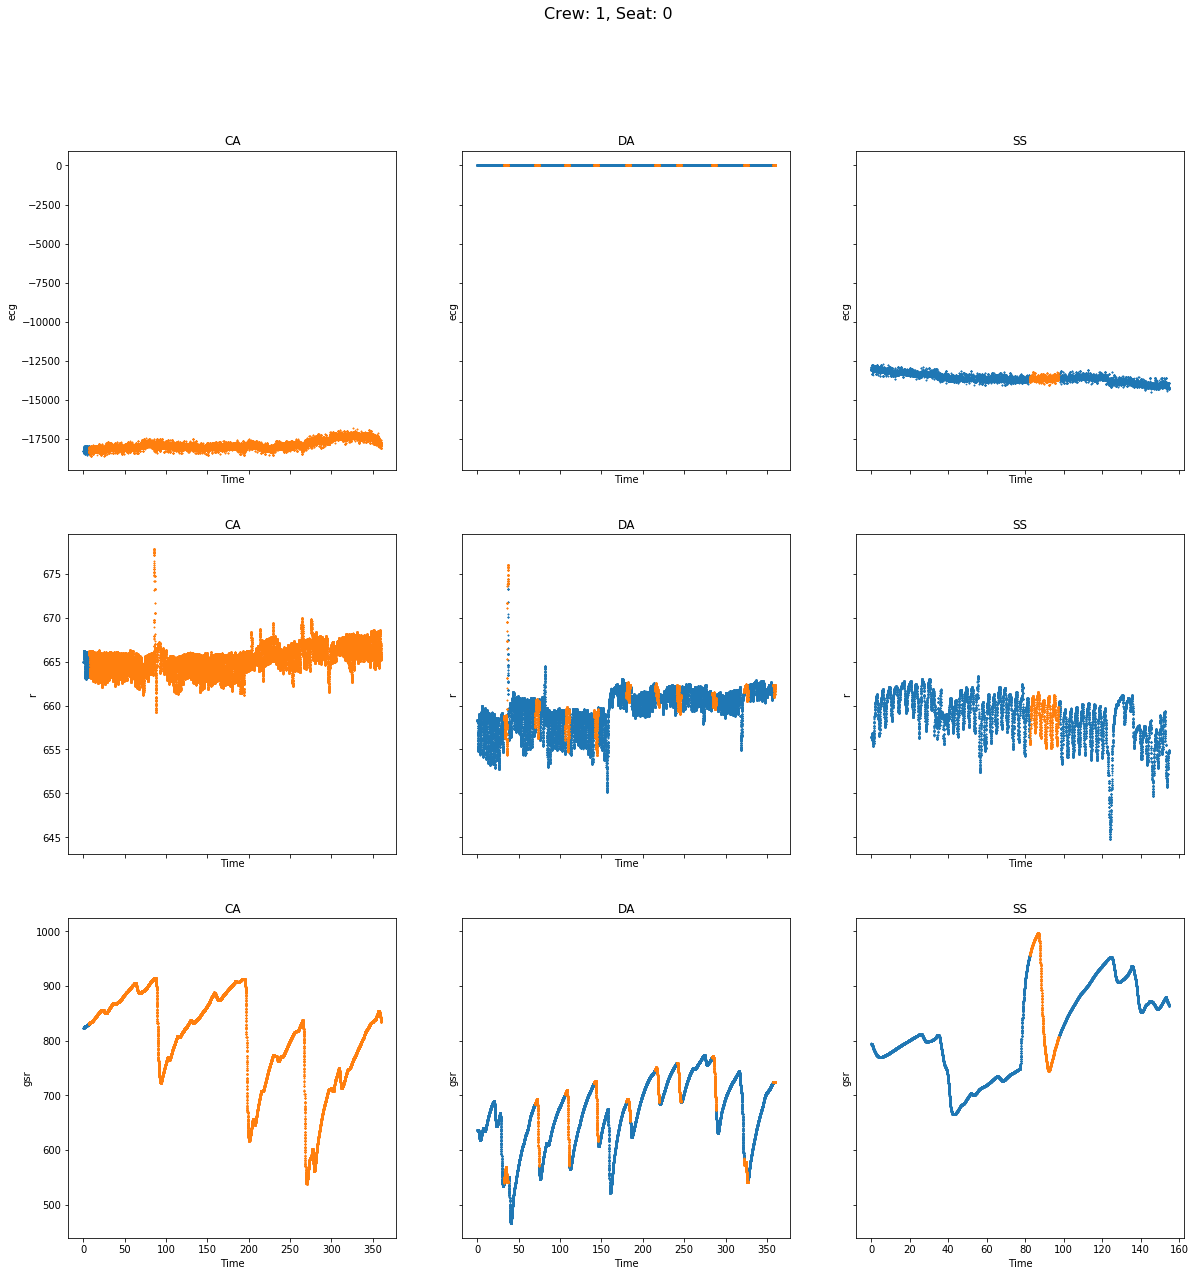

In [11]:
# Plot with raw data, no signal processing
data_state_subplot(df_train,1,0)

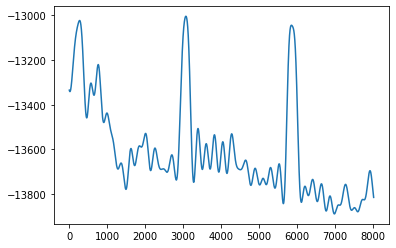

In [12]:
b, a = signal.butter(8,0.01)

y = signal.filtfilt(b, a, subset['ecg'], padlen=150)

plt.plot(y[6000:14024])

In [13]:
from biosppy.signals import ecg, resp

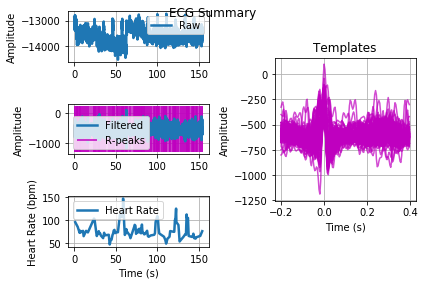

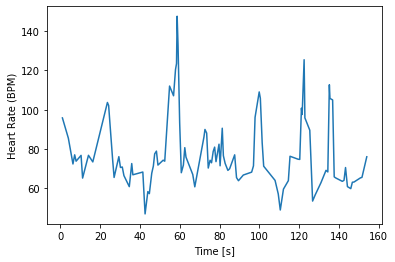

In [23]:
out = ecg.ecg(signal=subset['ecg'], sampling_rate=256, show=True)

plt.plot(out['heart_rate_ts'], out['heart_rate'])
plt.ylabel('Heart Rate (BPM)')
plt.xlabel('Time [s]');

In [15]:
import mne

In [16]:
# eegs = df_train.iloc[:,4:-4].to_numpy()
eegs = df_train.iloc[:,4:11].to_numpy()

In [17]:
sfreq = 200  # Sampling frequency
times = np.arange(0, 100, 0.003)  # Use 10000 samples (10s)

# Definition of channel types and names.
ch_types = ['mag', 'mag', 'mag']#, 'mag','mag','mag','mag']
ch_names = ['eeg_fp1', 'eeg_f7', 'eeg_f8']#, 'eeg_t4','eeg_t6','eeg_t5', 'eeg_t3' ]


eg0 = eegs[:,0]
eg1 = eegs[:,1]
eg2 = eegs[:,2]
data = np.array([eg0, eg1, eg2])
raw = mne.io.RawArray(data, info)

NameError: name 'info' is not defined

In [ ]:
# eegs looking kind of weird

In [ ]:
scalings = 'auto'  
raw.plot(n_channels=3, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

In [ ]:
raw.plot_psd(fmax=20)
raw.plot(duration=10, n_channels=3)
# Looking better